In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import scipy
sc.settings.verbosity = 3
sc.logging.print_header()
sc.set_figure_params(dpi=100, dpi_save=100)
    
import scvelo as scv
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.logging.print_versions()

import cellrank as cr
cr.settings.verbosity = 3
cr.logging.print_versions()

import matplotlib.pyplot as pl
from matplotlib import rcParams

import os

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.21.5 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.9 pynndescent==0.5.5
scvelo==0.2.4  scanpy==1.8.2  anndata==0.7.8  loompy==3.0.6  numpy==1.21.5  scipy==1.7.3  matplotlib==3.5.1  sklearn==1.0.2  pandas==1.3.5  
cellrank==1.5.1 scanpy==1.8.2 anndata==0.7.8 numpy==1.21.5 numba==0.55.0 scipy==1.7.3 pandas==1.3.5 pygpcca==1.0.3 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.9 scvelo==0.2.4 pygam==0.8.0 matplotlib==3.5.1 seaborn==0.11.2


In [2]:
raw = sc.read('C:/Users/Park_Lab/Documents/4in1_raw.h5ad')
raw

AnnData object with n_obs × n_vars = 7840 × 32285
    obs: 'predicted_doublets', 'batch'
    var: 'gene_ids', 'feature_types'

In [3]:
processed = sc.read('D:/HYJ/OneDrive - Inside MD Anderson/Gengyi_MSO/KO.h5ad')
processed

AnnData object with n_obs × n_vars = 2082 × 5000
    obs: 'predicted_doublets', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
raw.obs['leiden']= processed.obs['leiden']
adata=raw[raw.obs['leiden'].isin(['0', '1', '2', '3', '4', '5', '6'])]
adata

View of AnnData object with n_obs × n_vars = 2082 × 32285
    obs: 'predicted_doublets', 'batch', 'leiden'
    var: 'gene_ids', 'feature_types'

In [5]:
adata.uns['leiden_colors']=processed.uns['leiden_colors']
adata.obsm['X_umap']=processed.obsm['X_umap']
adata

Trying to set attribute `._uns` of view, copying.


AnnData object with n_obs × n_vars = 2082 × 32285
    obs: 'predicted_doublets', 'batch', 'leiden'
    var: 'gene_ids', 'feature_types'
    uns: 'leiden_colors'
    obsm: 'X_umap'

In [6]:
ldata = scv.read(filename='D:/ZGY/MSO_matrix/KO/KO.loom', cache=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... writing an h5ad cache file to speedup reading next time


... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


In [7]:
ldata.var_names_make_unique()
ldata

AnnData object with n_obs × n_vars = 2115 × 32285
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [8]:
adata = scv.utils.merge(adata, ldata)
adata

AnnData object with n_obs × n_vars = 2082 × 32285
    obs: 'predicted_doublets', 'batch', 'leiden', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'leiden_colors'
    obsm: 'X_umap'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

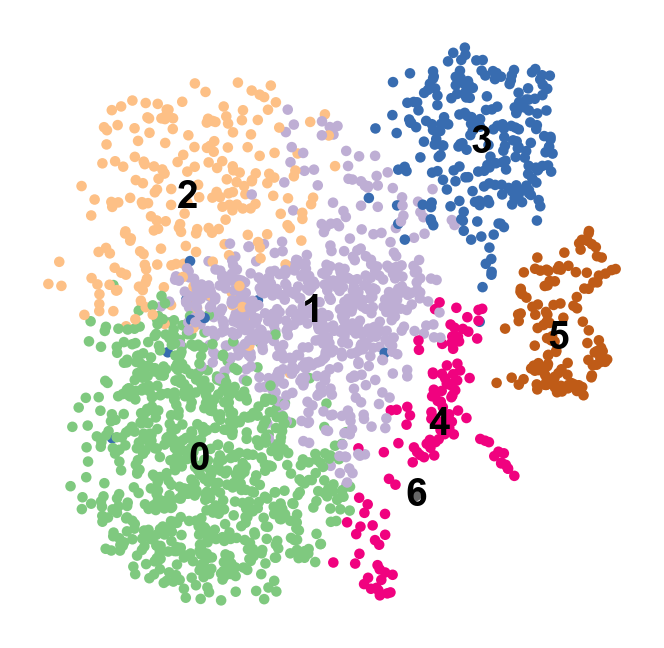

In [9]:
sc.pl.umap(adata, color=['leiden'], legend_loc='on data', frameon=False, title='', use_raw=False)

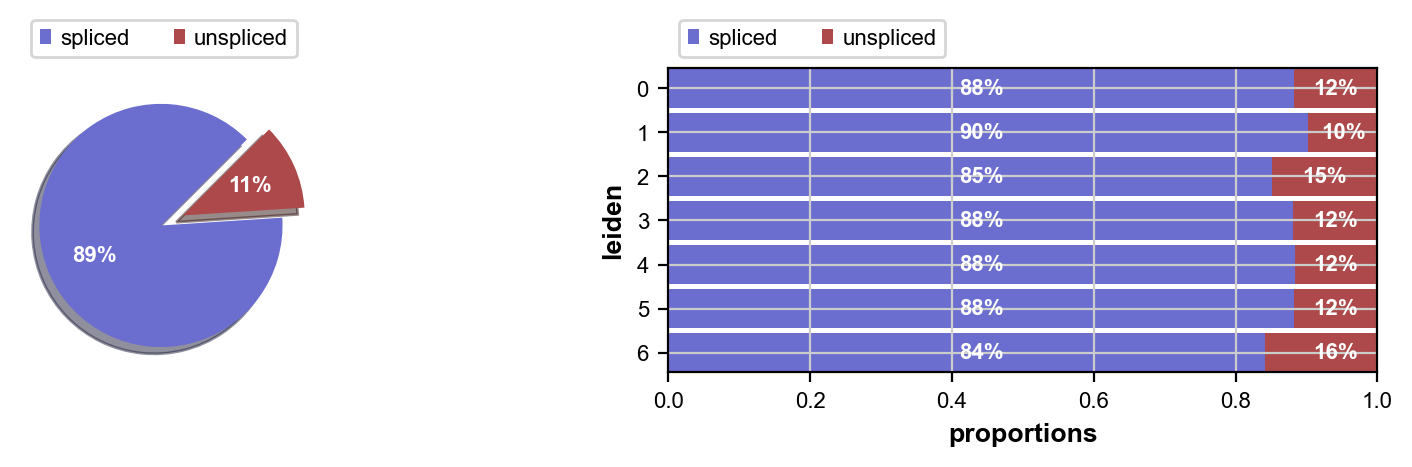

In [10]:
scv.pl.proportions(adata, groupby='leiden')

In [11]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000, enforce=True)
scv.pp.log1p(adata)
adata

Filtered out 27271 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


AnnData object with n_obs × n_vars = 2082 × 2000
    obs: 'predicted_doublets', 'batch', 'leiden', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'leiden_colors'
    obsm: 'X_umap'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [12]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=10)
adata

computing PCA
    on highly variable genes
    with n_comps=30
    finished (0:00:00)
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


AnnData object with n_obs × n_vars = 2082 × 2000
    obs: 'predicted_doublets', 'batch', 'leiden', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'leiden_colors', 'pca', 'neighbors'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [13]:
scv.tl.recover_dynamics(adata, n_jobs=16)
scv.tl.velocity(adata, mode='dynamical', use_raw=False)
scv.tl.velocity_graph(adata, n_jobs=16)
adata

recovering dynamics (using 16/16 cores)


  0%|          | 0/296 [00:00<?, ?gene/s]

C:\Users\Park_Lab\anaconda3\envs\HYJ_py38\lib\site-packages\scvelo\tools\dynamical_model.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
C:\Users\Park_Lab\anaconda3\envs\HYJ_py38\lib\site-packages\scvelo\tools\dynamical_model.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (0:00:20) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 16/16 cores)


  0%|          | 0/2082 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


C:\Users\Park_Lab\anaconda3\envs\HYJ_py38\lib\site-packages\scvelo\core\_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


AnnData object with n_obs × n_vars = 2082 × 2000
    obs: 'predicted_doublets', 'batch', 'leiden', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'leiden_colors', 'pca', 'neighbors', 'recover_dynamics', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs', 'loss'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'Ms', 'Mu', 'fit_t', 'fit_tau', 'fit_tau_', 'velocity', 'velocity_u'
    obsp: 'distances', 'connectivities'

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_4.svg


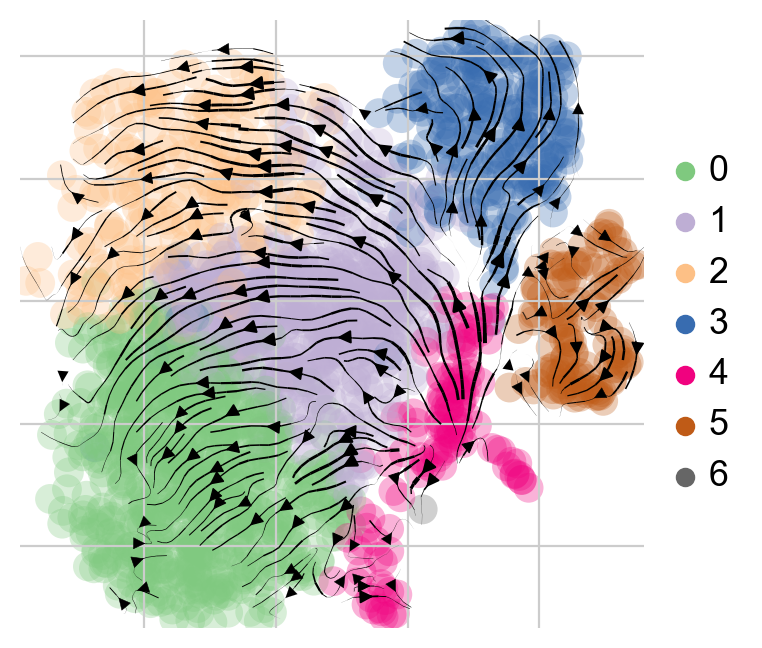

In [14]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['leiden'], legend_loc='right margin', title='', use_raw=False, save='4.svg')

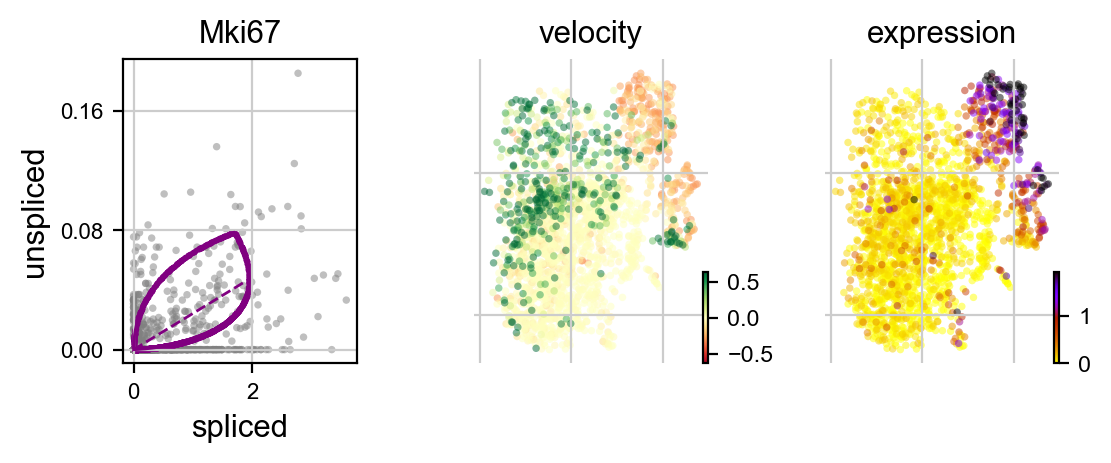

In [15]:
scv.pl.velocity(adata, var_names=['Mki67'],
                use_raw=False)

In [16]:
scv.tl.rank_velocity_genes(adata, groupby='leiden', min_corr=0.4)
df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head()

ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


0       1      2      3        4      5              6
0  2410006H16Rik  Gm1673  Actn4  Prom1   Tm9sf3  Prom1  2410006H16Rik
1         Malat1   Akap9   Cd44    Mme   Cavin2  Cep55           Knl1
2           Krt7    Smc2   Emp1   Tpx2      Esd    App         Malat1
3             Cp   Prkg2   Cdk6  Kif23      Mt2    Bsg        Phactr2
4         Txnrd1     Trf  Hmga2  Nupr1  S100a11  Samd5           Car8

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


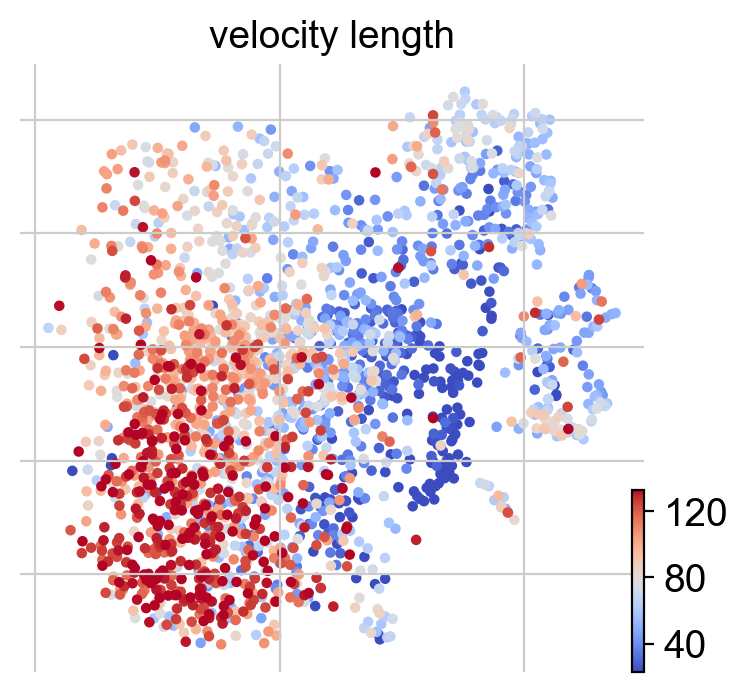

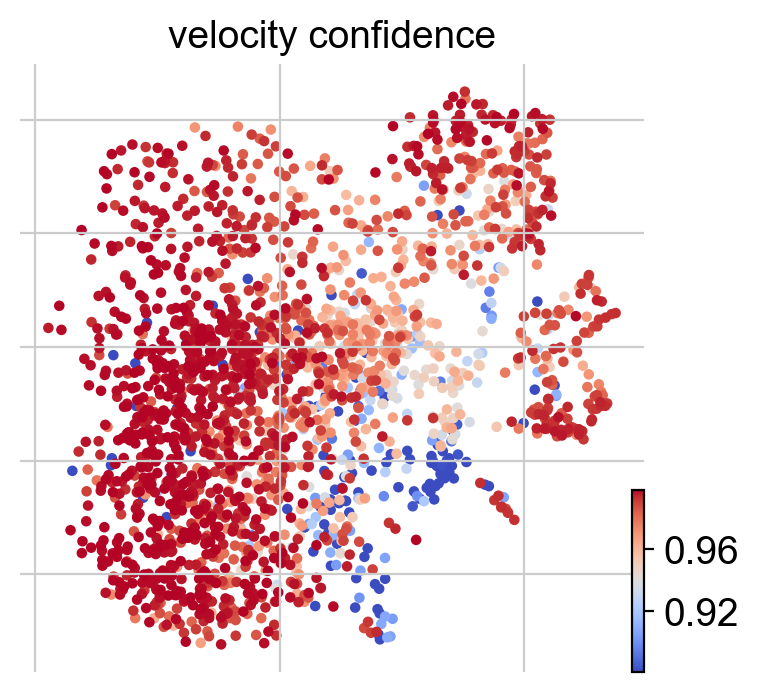

In [17]:
scv.tl.velocity_confidence(adata)
scv.pl.scatter(adata, c=['velocity_length'], cmap='coolwarm', perc=[5, 95], use_raw=False)
scv.pl.scatter(adata, c=['velocity_confidence'], cmap='coolwarm', perc=[5, 95], use_raw=False)

In [18]:
df = adata.obs.groupby('leiden')['velocity_length', 'velocity_confidence'].mean().T
df.style.background_gradient(cmap='coolwarm', axis=1)

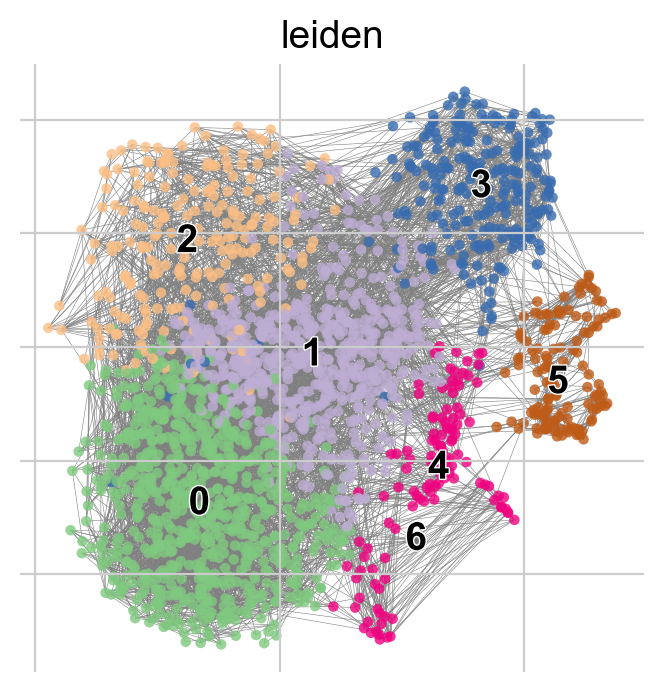

In [19]:
scv.pl.velocity_graph(adata, color=['leiden'], threshold=0.1)

computing terminal states
    identified 3 regions of root cells and 2 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file ./figures/scvelo_5.pdf


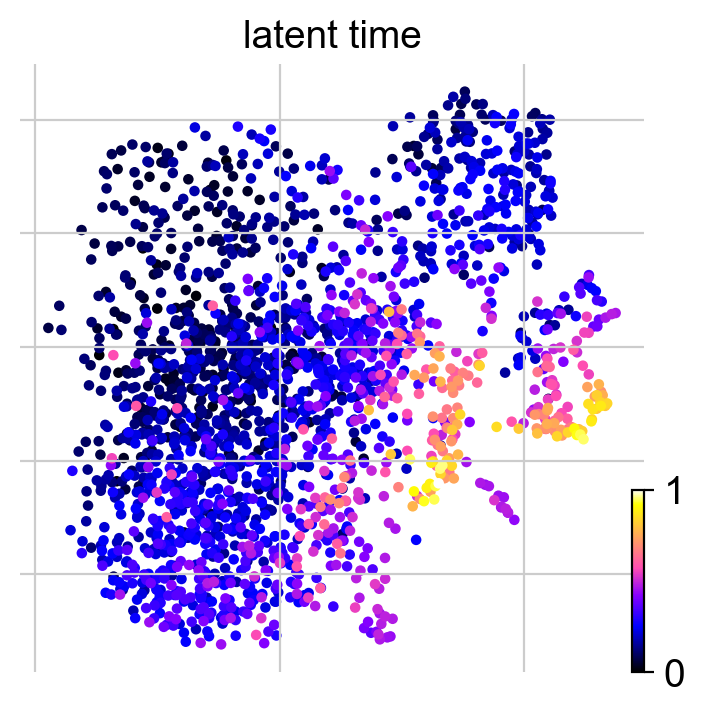

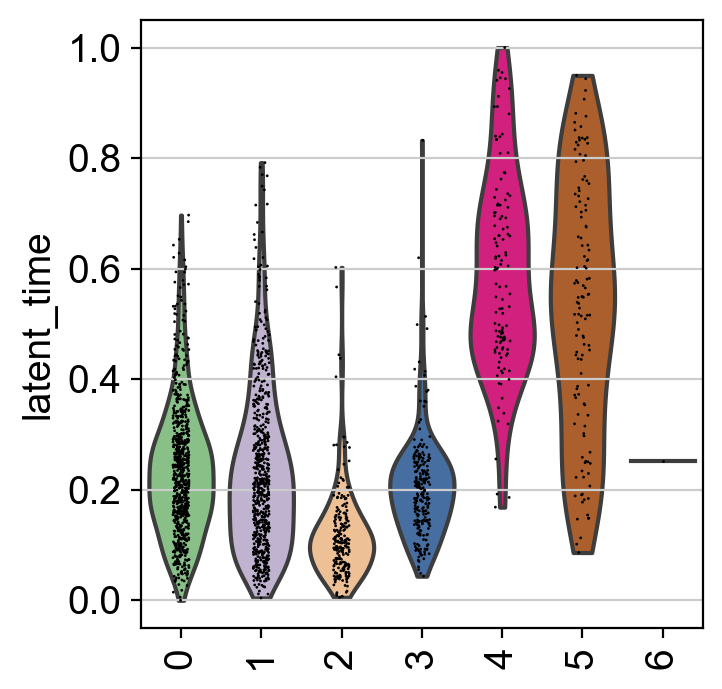

In [20]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot2', use_raw=False, save='5.pdf')
sc.pl.violin(adata, keys=["latent_time"], groupby="leiden", rotation=90, save="8.pdf")

In [21]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

running PAGA using priors: ['latent_time']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)
saving figure to file ./figures/scvelo_6.svg


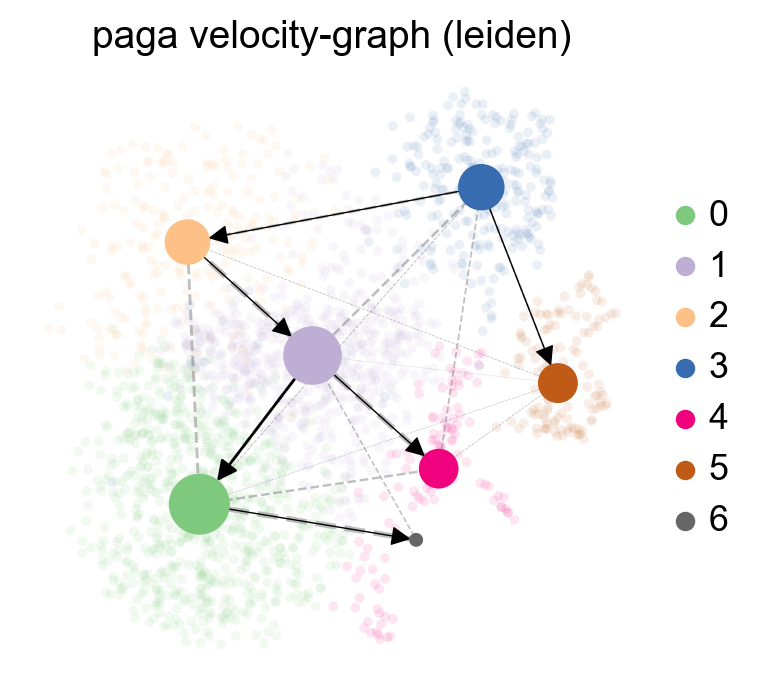

In [22]:
scv.tl.paga(adata, groups='leiden', vkey='velocity', use_time_prior="latent_time")
scv.pl.paga(adata, basis='umap', vkey='velocity', color='leiden', size=50, alpha=0.1, min_edge_width=0.5, node_size_scale=1.5, use_raw=False, save='6.svg')

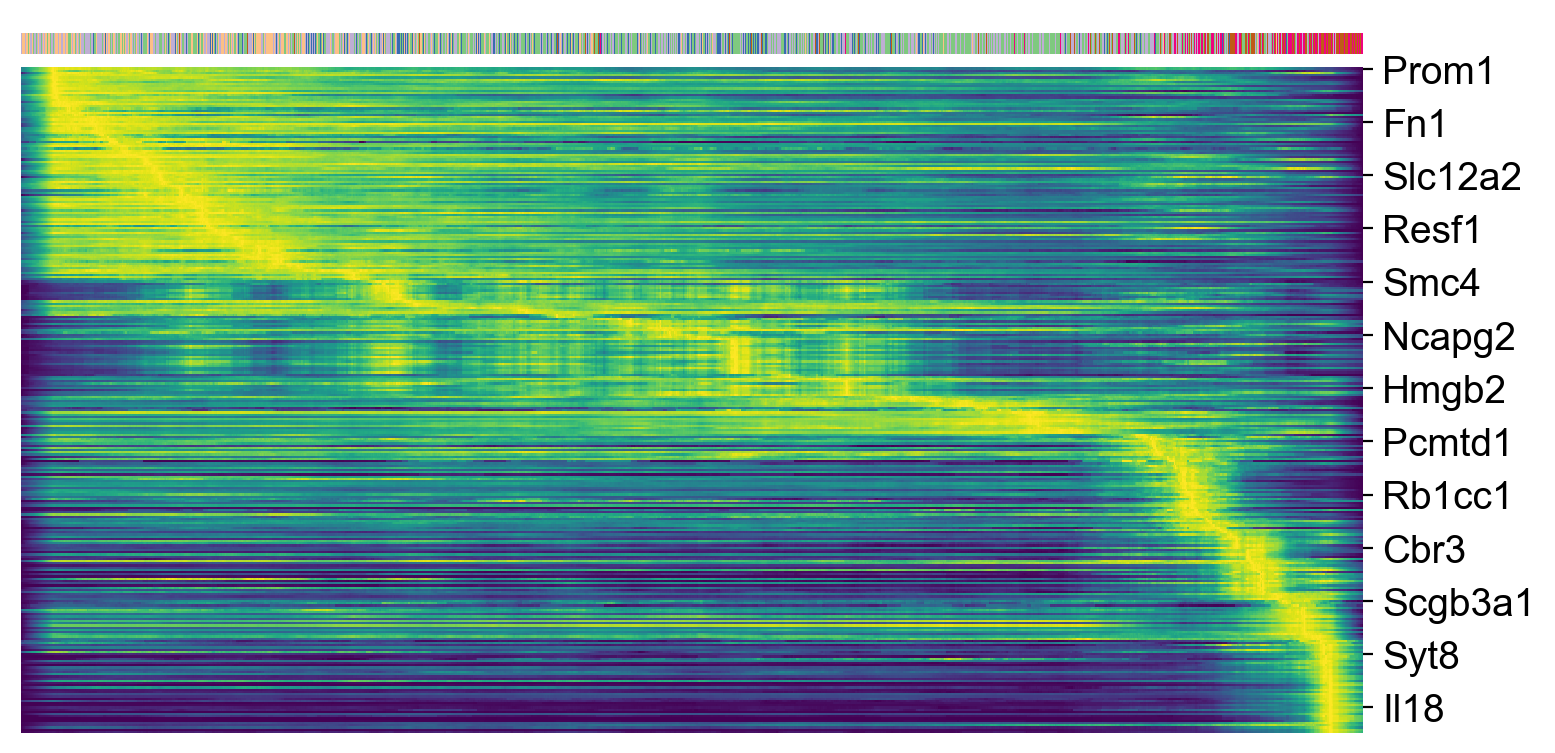

In [23]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='leiden', n_convolve=100)

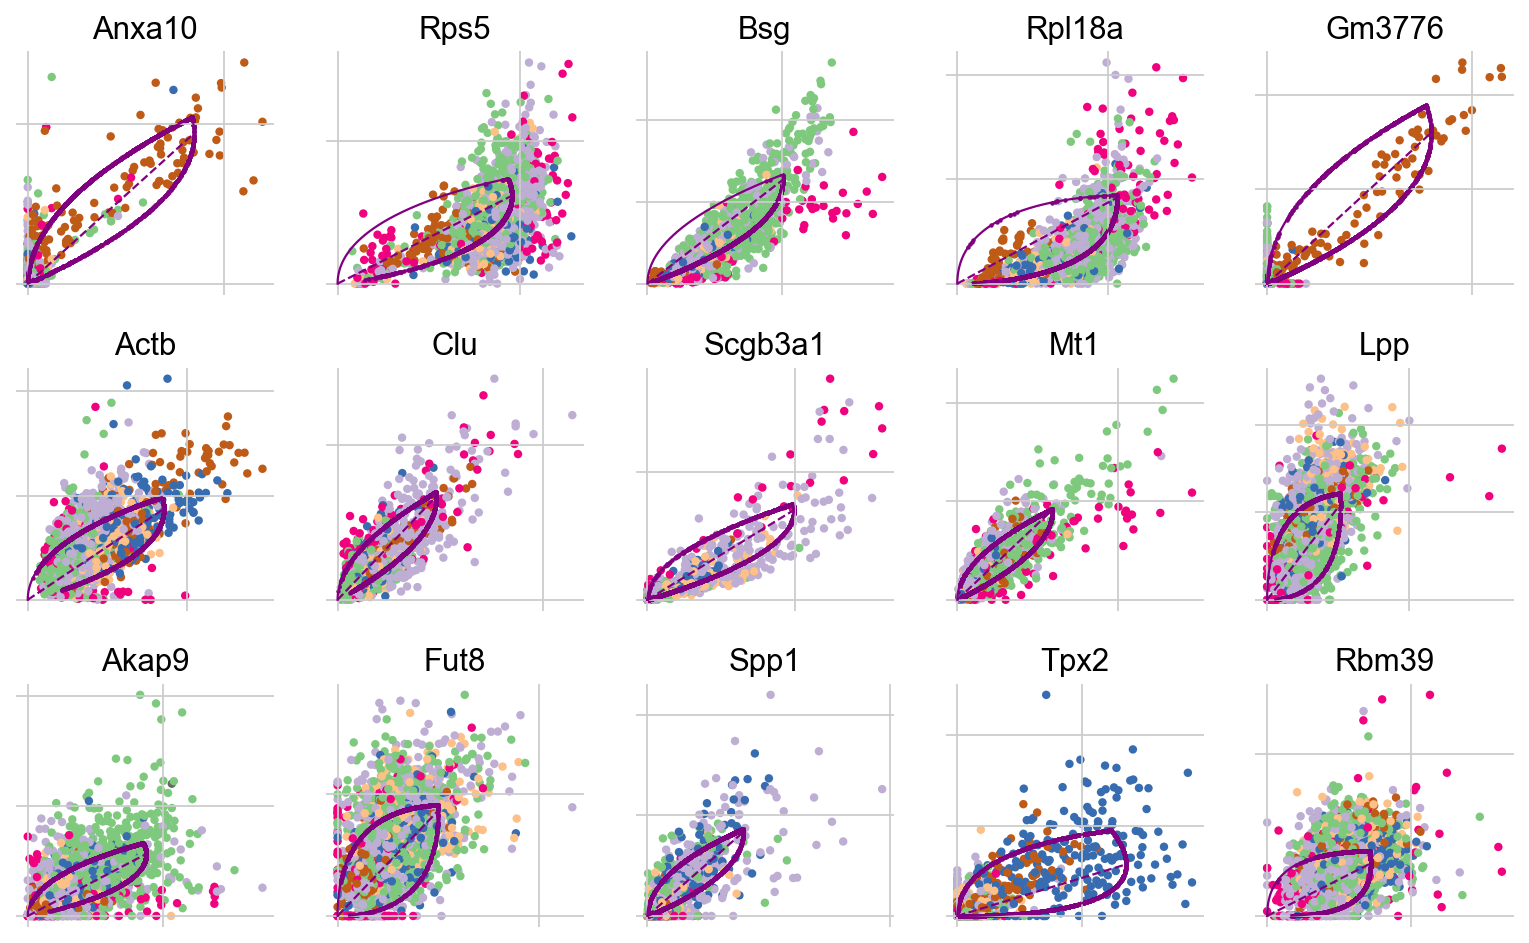

In [24]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index
scv.pl.scatter(adata, basis=top_genes[:15], ncols=5, frameon=False, color='leiden')

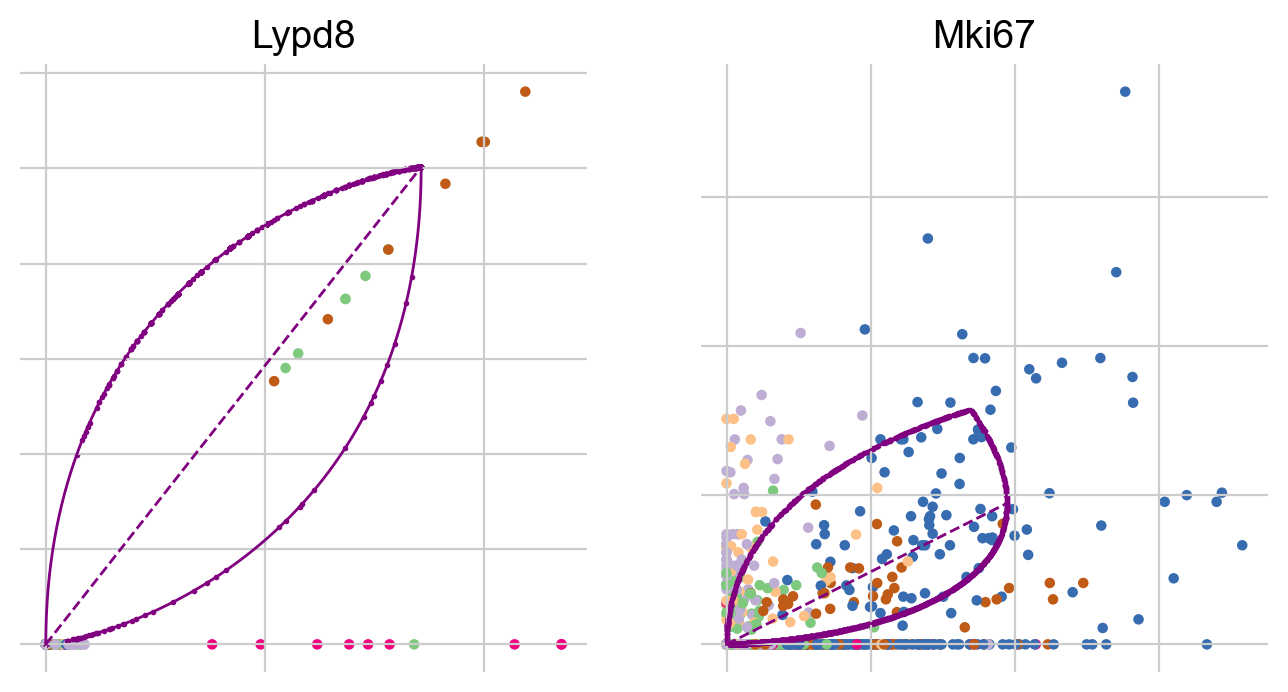

In [25]:
scv.pl.scatter(adata, var_names=['Muc3', 'Lypd8', 'Mki67', 'Lgr5'], color=['leiden'], frameon=False, use_raw=False)

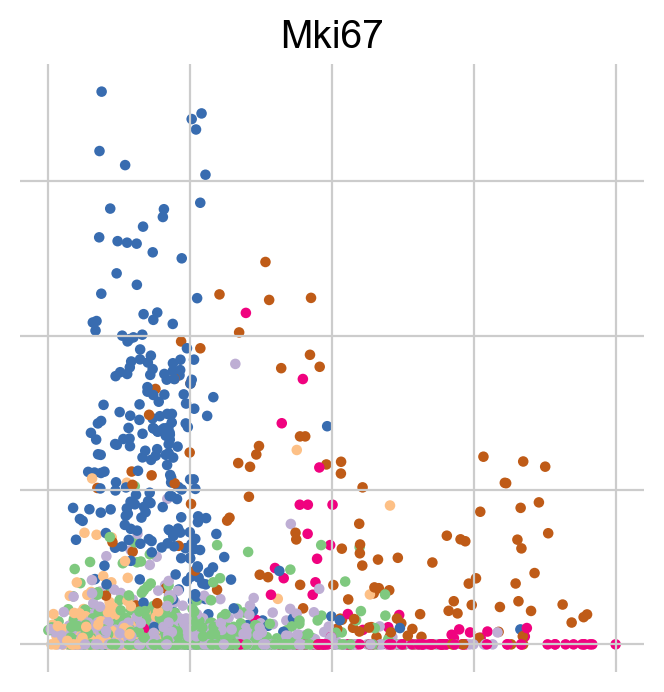

In [26]:
scv.pl.scatter(adata, x='latent_time', y=['Mki67'], color=['leiden'], frameon=False, use_raw=False)

In [27]:
scv.tl.rank_dynamical_genes(adata, groupby='leiden')
df = scv.get_df(adata, 'rank_dynamical_genes/names')
df.head(5)

ranking genes by cluster-specific likelihoods
    finished (0:00:00) --> added 
    'rank_dynamical_genes', sorted scores by group ids (adata.uns)


0       1      2       3      4       5       6
0     Rps5    Rps5   Rps5    Rps5  Uba52  Gm3776     Bsg
1   Rpl18a     Bsg  Rps18   Ahnak   Atf3   Cldn7   Uba52
2      Bsg    Actb   Actb  Nusap1    Esd  Anxa10    Rps5
3    Uba52   Rps18  Rbm39     Lpp   Fut8    Psca  Prrc2c
4  Epb41l2  Rpl18a   Emp1   Akap9  Rplp0    Cdk1   Rbm39

In [28]:
for cluster in ['0', '1', '2', '3', '4', '5', '6']:
    scv.pl.scatter(adata, df[cluster][:5], ylabel=cluster, frameon=False, color='leiden')

KeyError: 'Aqp5+ epithelial_1'

In [ ]:
adata.write('D:/HYJ/OneDrive - Inside MD Anderson/Gengyi_MSO/KO_scVelo.h5ad', compression='gzip')

In [ ]:
# export latent time
adata.obs.to_csv('C:/Users/Park_Lab/Documents/scVelo/KO_obs.csv')